In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import Series, DataFrame
from pylab import rcParams
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\CoffeeML.csv", parse_dates=True)

count_row = df.shape[0]  # gives number of row count
count_column = df.shape[1] # gives number of column count

print('Number of rows: {}'.format(count_row))
print('Number of columns: {}'.format(count_column))

df.head()

Number of rows: 12825570
Number of columns: 11


,timestamp,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
0,2020-07-16T00:00:00.024Z,15091.0,12.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-07-16T00:00:00.026Z,NaN,NaN,NaN,1548.0,0.0,2.0,1.0,NaN,NaN,NaN
2,2020-07-16T00:00:00.134Z,14695.0,3.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-07-16T00:00:00.135Z,NaN,NaN,NaN,1550.0,0.0,2.0,1.0,NaN,NaN,NaN
4,2020-07-16T00:00:00.236Z,15082.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

timestamp                                       object
AnalogVibrationSensor.vibrationTotal           float64
TemperatureAndHumiditySensor.humidity          float64
AnalogNoiseSensor.noiseDiff                    float64
TemperatureAndHumiditySensor.temperature       float64
AnalogNoiseSensor.noiseRange                   float64
AnalogVibrationSensor.vibrationDiff            float64
AnalogVibrationSensor.vibrationRange           float64
VibrationThresholdSensor.vibrationThreshold    float64
AnalogNoiseSensor.noiseTotal                   float64
Keypad.keyPressed                              float64
dtype: object

# Removoing duplicates values from the variable timestamp

In [4]:
df1 = df.drop_duplicates(["timestamp"])

In [5]:
count_row = df1.shape[0]  # gives number of row count
count_column = df1.shape[1] # gives number of column count
print('Number of rows: {}'.format(count_row))
print('Number of columns: {}'.format(count_column))

Number of rows: 12823005
Number of columns: 11


In [6]:
df1.nunique()

timestamp                                      12823005
AnalogVibrationSensor.vibrationTotal               8072
TemperatureAndHumiditySensor.humidity              6672
AnalogNoiseSensor.noiseDiff                        6874
TemperatureAndHumiditySensor.temperature           5884
AnalogNoiseSensor.noiseRange                       7946
AnalogVibrationSensor.vibrationDiff                5393
AnalogVibrationSensor.vibrationRange               6851
VibrationThresholdSensor.vibrationThreshold        4356
AnalogNoiseSensor.noiseTotal                       4405
Keypad.keyPressed                                    10
dtype: int64

In [7]:
df1 = df1.set_index('timestamp')
df1.head(3)

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
timestamp,,,,,,,,,,
2020-07-16T00:00:00.024Z,15091.0,12.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-16T00:00:00.026Z,NaN,NaN,NaN,1548.0,0.0,2.0,1.0,NaN,NaN,NaN
2020-07-16T00:00:00.134Z,14695.0,3.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# checking if there is any missing values

In [8]:
df1.isnull().values.any()

True

# checking for the total number of missing values in each column

In [9]:
df1.isnull().sum()

AnalogVibrationSensor.vibrationTotal            8008194
TemperatureAndHumiditySensor.humidity           8035796
AnalogNoiseSensor.noiseDiff                     7696632
TemperatureAndHumiditySensor.temperature        7657962
AnalogNoiseSensor.noiseRange                    7937199
AnalogVibrationSensor.vibrationDiff             7942458
AnalogVibrationSensor.vibrationRange            7669686
VibrationThresholdSensor.vibrationThreshold    11154372
AnalogNoiseSensor.noiseTotal                   11157741
Keypad.keyPressed                              12820379
dtype: int64

# Descriptive statistics

In [10]:
df1.describe()

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
count,4.814811e+06,4.787209e+06,5.126373e+06,5.165043e+06,4.885806e+06,4.880547e+06,5.153319e+06,1.668633e+06,1.665264e+06,2626.000000
mean,6.979726e+03,8.827470e+02,1.351485e+03,9.730481e+02,5.229527e+03,2.927510e+02,1.229133e+03,1.684506e+02,1.705898e+02,8.256997
std,6.672631e+03,3.436085e+03,4.180964e+03,2.242163e+03,6.918956e+03,1.472521e+03,3.987093e+03,1.436930e+03,1.434297e+03,15.534325
min,-2.000000e+00,-3.000000e+00,-2.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000e+00,-3.000000e+00,-2.000000e+00,-2.000000e+00,0.000000
25%,1.552000e+03,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000
50%,1.573000e+03,2.000000e+00,7.000000e+00,9.000000e+00,9.000000e+00,2.000000e+00,1.000000e+00,1.800000e+01,2.000000e+01,3.000000
75%,1.435800e+04,1.000000e+01,1.400000e+01,1.556000e+03,1.403100e+04,1.000000e+01,1.200000e+01,3.006250e+01,4.468750e+01,3.000000
max,2.872200e+04,2.385800e+04,2.297300e+04,2.534200e+04,2.901200e+04,2.498900e+04,2.698800e+04,1.821800e+04,2.079200e+04,46.937500


# correlation plot 

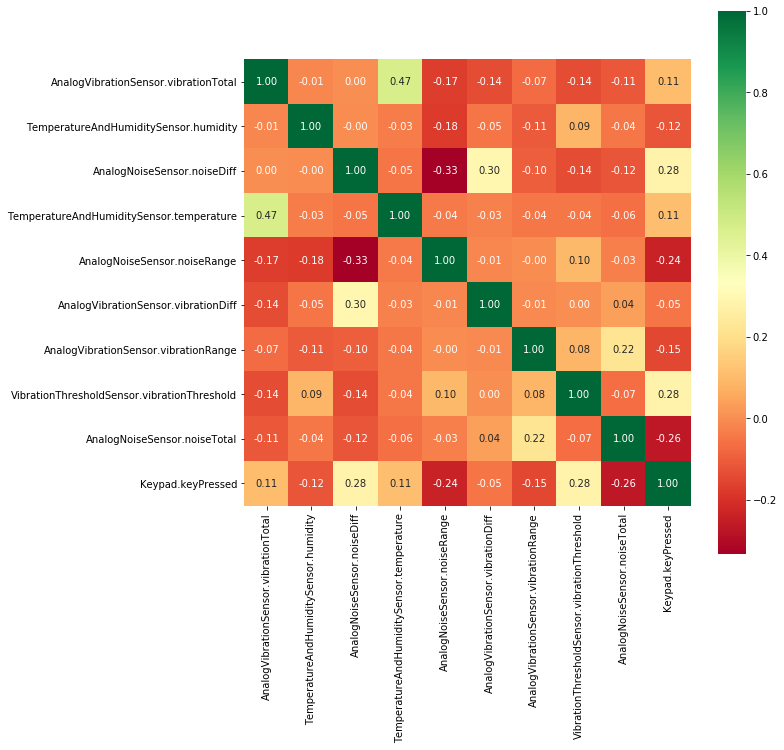

In [11]:
plt.figure(figsize=(10,10))
p=sns.heatmap(df1.corr(), annot=True,cmap='RdYlGn',square=True, fmt='.2f')

In [12]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

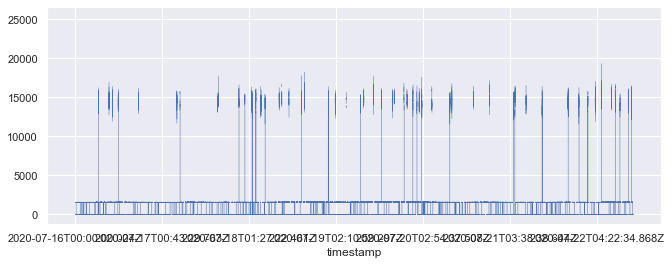

In [13]:
df1['TemperatureAndHumiditySensor.temperature'].plot(linewidth=0.5);

In [ ]:
cols_plot = ['TemperatureAndHumiditySensor.humidity', 'TemperatureAndHumiditySensor.temperature', 'AnalogNoiseSensor.noiseDiff ']
axes = df1[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('AnalogVibrationSensor.vibrationTotal')

# Visualizing time series

In [14]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

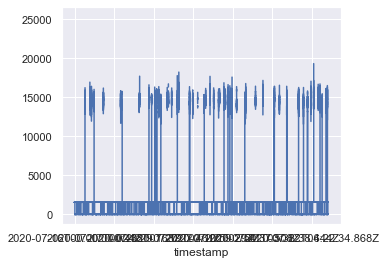

In [15]:
df1['TemperatureAndHumiditySensor.temperature'].plot()

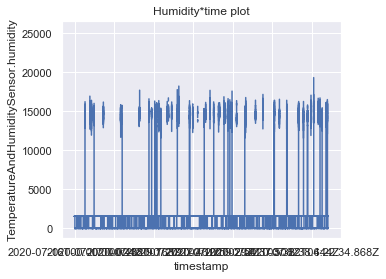

In [16]:
df2 = df1.sample(n=100, random_state=25, axis=0)

plt.xlabel('timestamp')
plt.ylabel('TemperatureAndHumiditySensor.humidity')
plt.title('Humidity*time plot')

df1['TemperatureAndHumiditySensor.temperature'].plot()